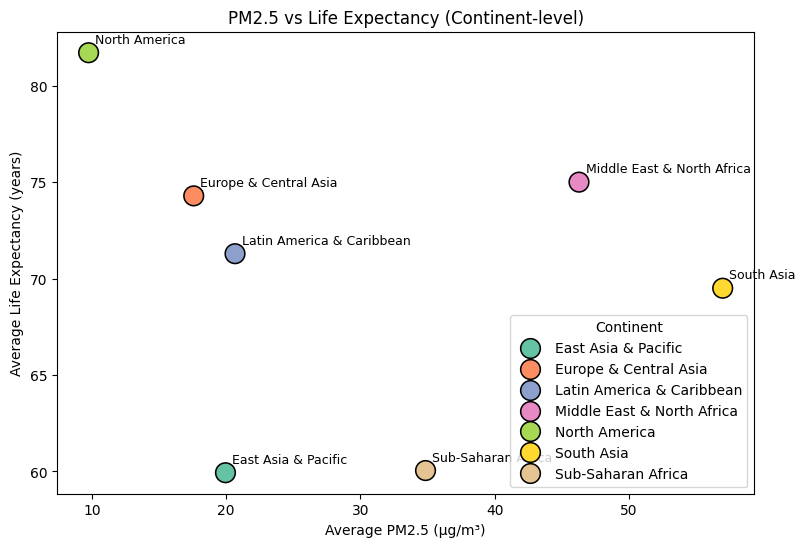

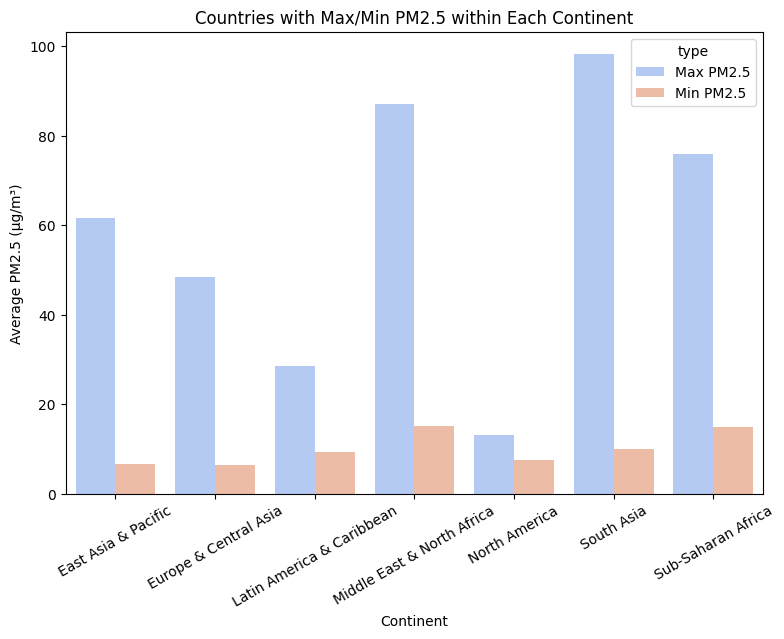

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Q1.csv")


df_continent = df.groupby("Continent", as_index=False).agg({
    "avg_pm25": "mean",
    "avg_life_expectency": "mean"
})

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_continent,
    x="avg_pm25",
    y="avg_life_expectency",
    hue="Continent",
    s=200,
    palette="Set2",
    edgecolor="black"
)
for i, row in df_continent.iterrows():
    plt.text(row["avg_pm25"]+0.5, row["avg_life_expectency"]+0.5, row["Continent"], fontsize=9)
plt.title("PM2.5 vs Life Expectancy (Continent-level)")
plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("Average Life Expectancy (years)")
plt.show()


df_extremes = df.loc[df.groupby("Continent")["avg_pm25"].idxmax()]
df_extremes["type"] = "Max PM2.5"
df_min = df.loc[df.groupby("Continent")["avg_pm25"].idxmin()]
df_min["type"] = "Min PM2.5"

df_extremes = pd.concat([df_extremes, df_min])

plt.figure(figsize=(9,6))
sns.barplot(
    data=df_extremes,
    x="Continent",
    y="avg_pm25",
    hue="type",
    palette="coolwarm"
)
plt.title("Countries with Max/Min PM2.5 within Each Continent")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(rotation=30)
plt.show()


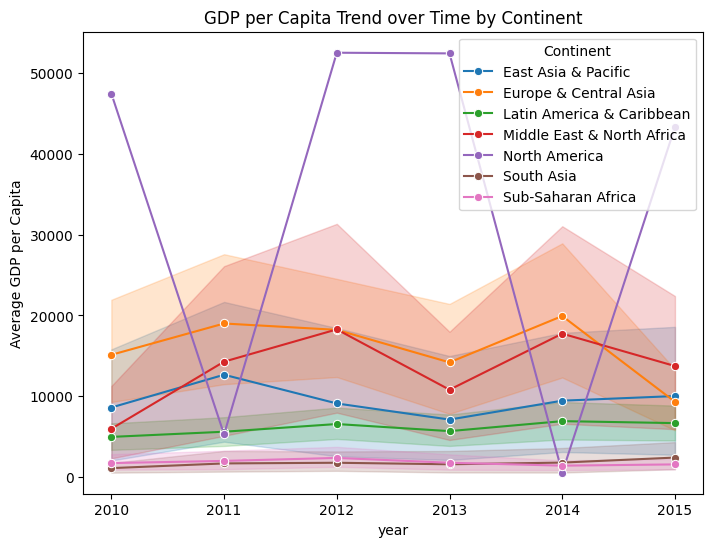

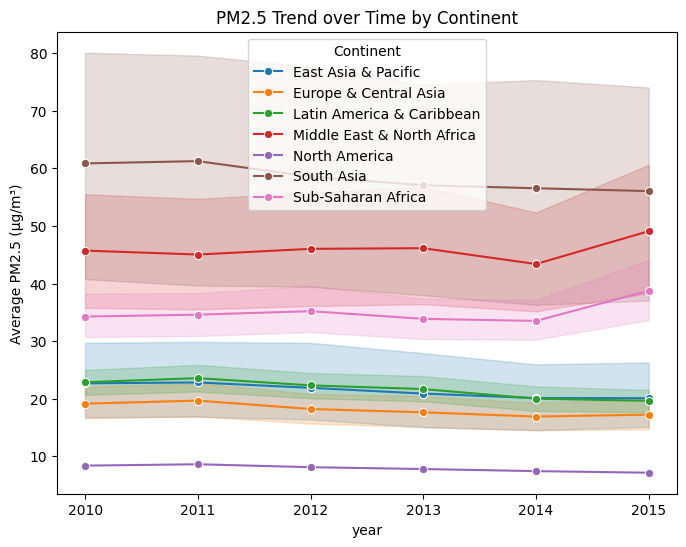

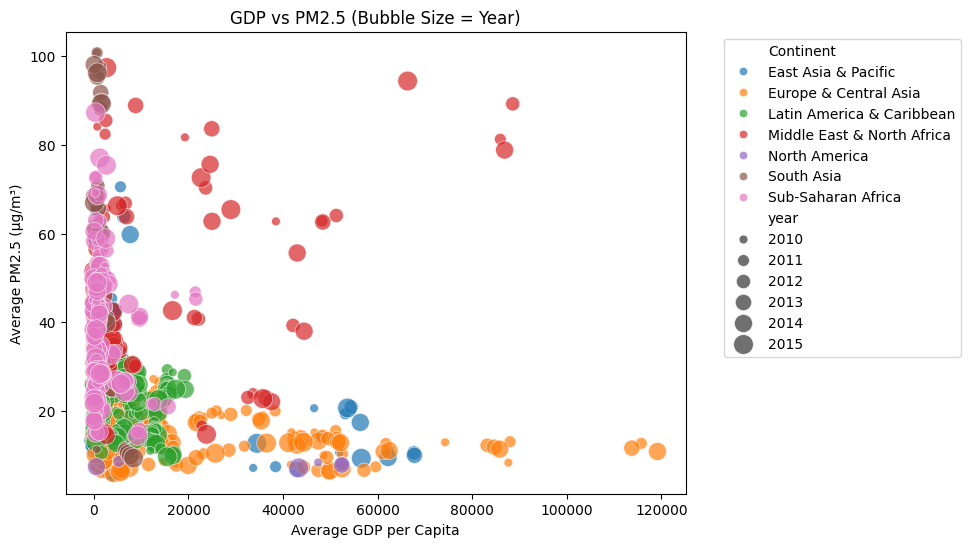

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Q2.csv")


df = df.dropna(subset=["avg_gdp"])


plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="year", y="avg_gdp", hue="Continent", marker="o")
plt.title("GDP per Capita Trend over Time by Continent")
plt.ylabel("Average GDP per Capita")
plt.show()


plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="year", y="avg_pm25", hue="Continent", marker="o")
plt.title("PM2.5 Trend over Time by Continent")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="avg_gdp",
    y="avg_pm25",
    hue="Continent",
    size="year",
    sizes=(40,200),
    alpha=0.7
)
plt.title("GDP vs PM2.5 (Bubble Size = Year)")
plt.xlabel("Average GDP per Capita")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


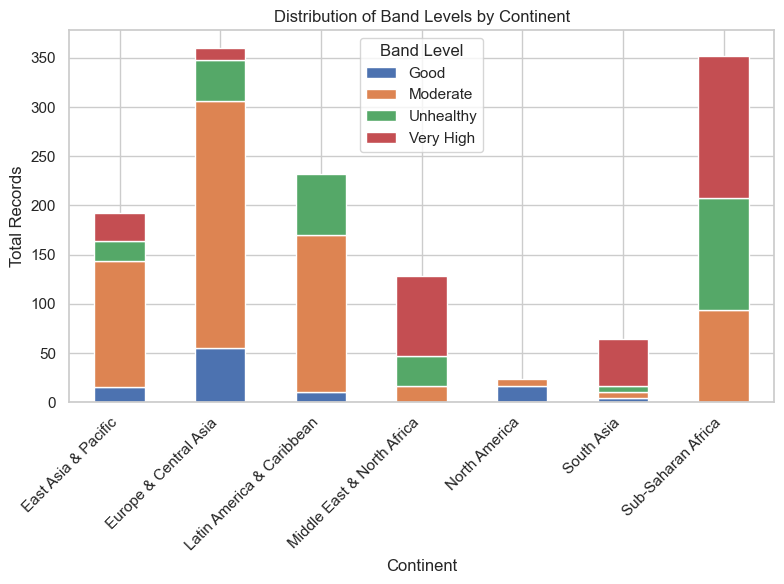

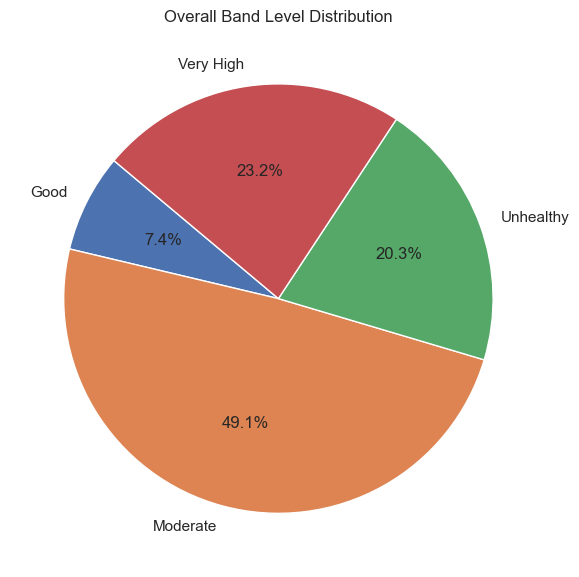

In [20]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "Q3.csv"   # 换成你的文件路径
data = pd.read_csv(file_path)

# 设置风格
sns.set(style="whitegrid")

# ========== 图1：按大洲 & band_level 的堆叠柱状图 ==========
continent_summary = data.groupby(["Continent", "band_level"])["Record"].sum().unstack(fill_value=0)

ax1 = continent_summary.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Distribution of Band Levels by Continent")
plt.ylabel("Total Records")
plt.xlabel("Continent")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Band Level")
plt.tight_layout()
plt.show()

# ========== 图2：整体 band_level 的比例饼图 ==========
band_summary = data.groupby("band_level")["Record"].sum()

plt.figure(figsize=(6,6))
plt.pie(band_summary, labels=band_summary.index, autopct="%1.1f%%", startangle=140)
plt.title("Overall Band Level Distribution")
plt.tight_layout()
plt.show()


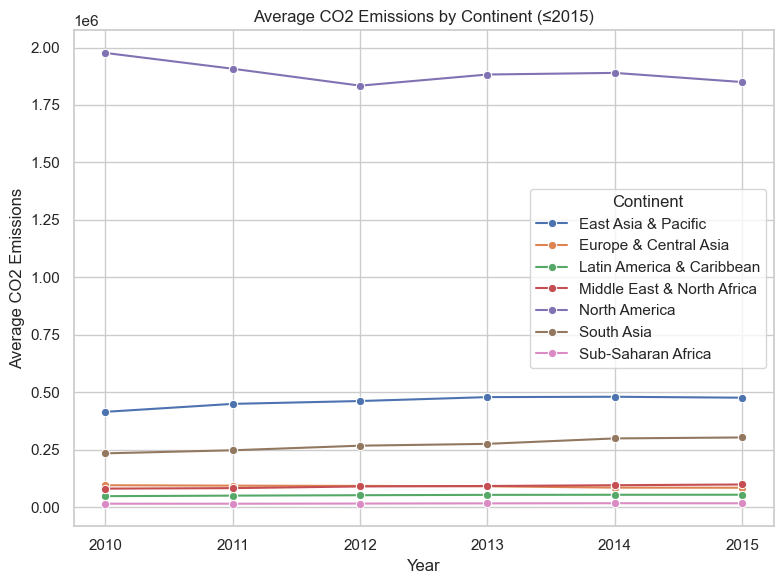

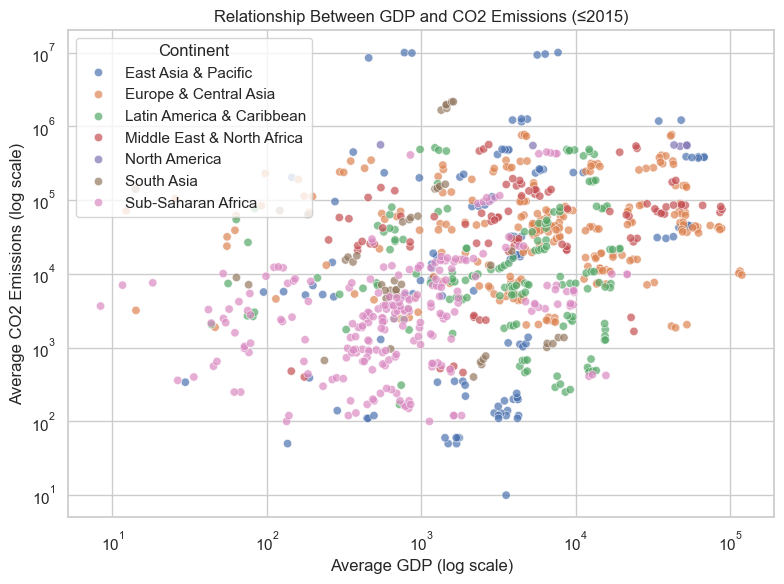

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
q4_data = pd.read_csv("Q4.csv")

# ========== 大问题 ==========
# How do CO2 emissions evolve over time across continents,
# and what is their relationship with economic development (GDP)?

sns.set(style="whitegrid")

# 先筛选年份 ≤ 2015
q4_data = q4_data[q4_data["year"] <= 2015]

# ---------- 图1：CO2 排放趋势（时间维度） ----------
plt.figure(figsize=(8,6))
trend = q4_data.groupby(["year","Continent"])["avg_co2"].mean().reset_index()

sns.lineplot(data=trend, x="year", y="avg_co2", hue="Continent", marker="o")
plt.title("Average CO2 Emissions by Continent (≤2015)")
plt.ylabel("Average CO2 Emissions")
plt.xlabel("Year")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()

# ---------- 图2：GDP 与 CO2 的关系 ----------
plt.figure(figsize=(8,6))

scatter_data = q4_data.dropna(subset=["avg_co2", "avg_gdp"])
sns.scatterplot(data=scatter_data, x="avg_gdp", y="avg_co2", hue="Continent", alpha=0.7)

plt.xscale("log")  # GDP 范围差距大 → 对数坐标更清晰
plt.yscale("log")  # CO2 范围差距大 → 对数坐标更清晰
plt.title("Relationship Between GDP and CO2 Emissions (≤2015)")
plt.xlabel("Average GDP (log scale)")
plt.ylabel("Average CO2 Emissions (log scale)")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()



/var/folders/zm/15khml3n0hb3_l0rm7qr556r0000gn/T/ipykernel_80969/3780044757.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Health_index", y="Country", palette="viridis")


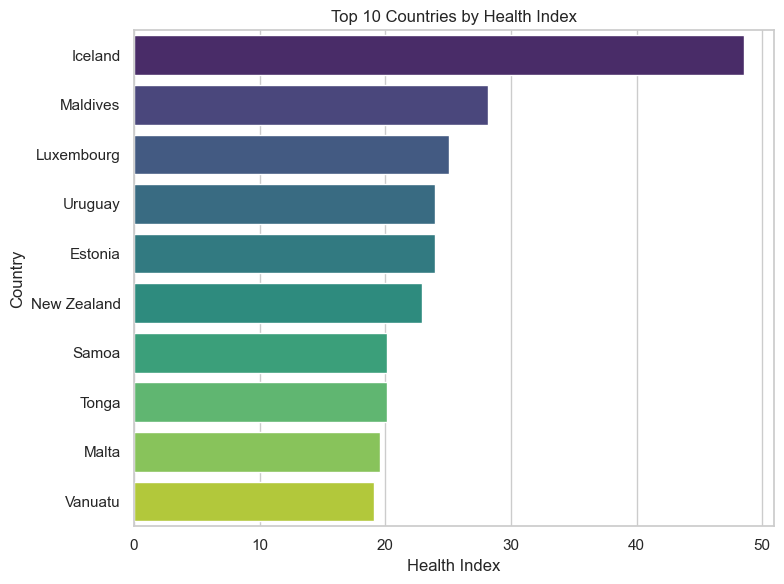

/var/folders/zm/15khml3n0hb3_l0rm7qr556r0000gn/T/ipykernel_80969/3780044757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_countries, x="Health_index", y="Country", palette="magma")


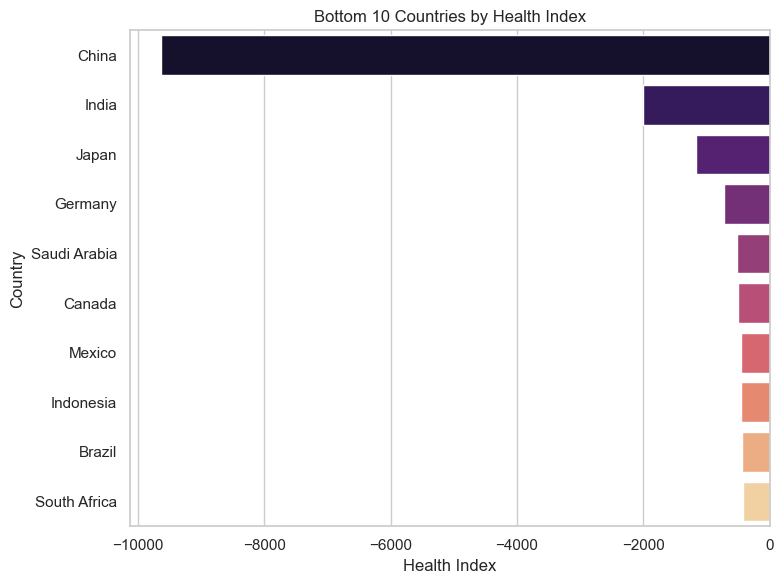

/var/folders/zm/15khml3n0hb3_l0rm7qr556r0000gn/T/ipykernel_80969/3780044757.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_avg.sort_values("Health_index", ascending=False),


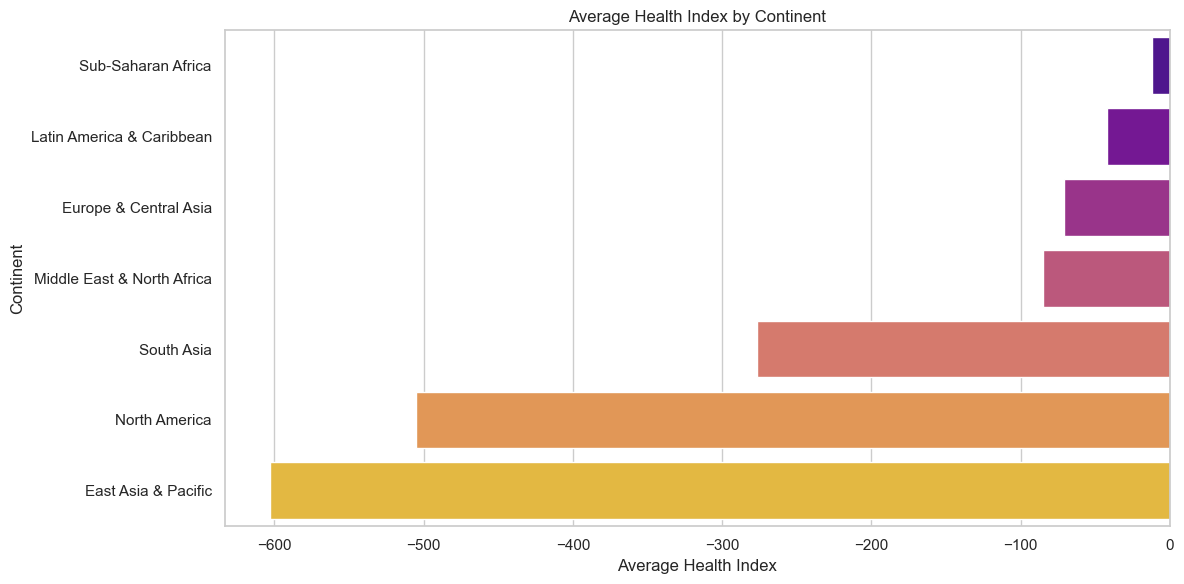

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
q5_data = pd.read_csv("Q5.csv")

# 去掉 Health_index 为空的行
q5_data = q5_data.dropna(subset=["Health_index"])

# ---------- 图1：Top 15 国家 ----------
top_countries = q5_data.sort_values("Health_index", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(data=top_countries, x="Health_index", y="Country", palette="viridis")
plt.title("Top 10 Countries by Health Index")
plt.xlabel("Health Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# ---------- 图2：Bottom 15 国家 ----------
bottom_countries = q5_data.sort_values("Health_index", ascending=True).head(10)

plt.figure(figsize=(8,6))
sns.barplot(data=bottom_countries, x="Health_index", y="Country", palette="magma")
plt.title("Bottom 10 Countries by Health Index")
plt.xlabel("Health Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# ---------- 图3：大洲层面平均值 ----------
continent_avg = q5_data.groupby("Continent")["Health_index"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=continent_avg.sort_values("Health_index", ascending=False),
            x="Health_index", y="Continent", palette="plasma")
plt.title("Average Health Index by Continent")
plt.xlabel("Average Health Index")
plt.ylabel("Continent")
plt.tight_layout()
plt.show()


